In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import joblib

In [132]:
df = pd.read_csv('EV_Predictive_Maintenance_Dataset_15min.csv')
print(df.head())

             Timestamp       SoC       SoH  Battery_Voltage  Battery_Current  \
0  2020-01-01 00:00:00  0.826099  0.941338       210.163881       -22.753095   
1  2020-01-01 00:15:00  0.064728  0.916059       364.000102       -27.701120   
2  2020-01-01 00:30:00  0.873643  0.908020       388.855089       -36.646406   
3  2020-01-01 00:45:00  0.853009  0.916476       370.570602       -37.609429   
4  2020-01-01 01:00:00  0.947540  0.913206       390.011904       -14.275808   

   Battery_Temperature  Charge_Cycles  Motor_Temperature  Motor_Vibration  \
0            27.149201     149.190930          48.496049         0.369095   
1            53.655101     171.702388          57.829492         1.449195   
2            29.559090     191.617645          46.518363         1.859045   
3            29.690283     111.881817          54.163681         0.381500   
4            28.864338     163.774377          42.075978         0.433927   

   Motor_Torque  ...  Load_Weight  Driving_Speed  Distan

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175393 entries, 0 to 175392
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               175393 non-null  object 
 1   SoC                     175393 non-null  float64
 2   SoH                     175393 non-null  float64
 3   Battery_Voltage         175393 non-null  float64
 4   Battery_Current         175393 non-null  float64
 5   Battery_Temperature     175393 non-null  float64
 6   Charge_Cycles           175393 non-null  float64
 7   Motor_Temperature       175393 non-null  float64
 8   Motor_Vibration         175393 non-null  float64
 9   Motor_Torque            175393 non-null  float64
 10  Motor_RPM               175393 non-null  float64
 11  Power_Consumption       175393 non-null  float64
 12  Brake_Pad_Wear          175393 non-null  float64
 13  Brake_Pressure          175393 non-null  float64
 14  Reg_Brake_Efficiency

In [134]:
df.isnull().sum()

Timestamp                 0
SoC                       0
SoH                       0
Battery_Voltage           0
Battery_Current           0
Battery_Temperature       0
Charge_Cycles             0
Motor_Temperature         0
Motor_Vibration           0
Motor_Torque              0
Motor_RPM                 0
Power_Consumption         0
Brake_Pad_Wear            0
Brake_Pressure            0
Reg_Brake_Efficiency      0
Tire_Pressure             0
Tire_Temperature          0
Suspension_Load           0
Ambient_Temperature       0
Ambient_Humidity          0
Load_Weight               0
Driving_Speed             0
Distance_Traveled         0
Idle_Time                 0
Route_Roughness           0
RUL                       0
Failure_Probability       0
Maintenance_Type          0
TTF                       0
Component_Health_Score    0
dtype: int64

In [135]:
df['Failure_Binary'] = (df['Failure_Probability'] > 0.5).astype(int)
X = df.drop(columns=['Failure_Binary', 'Failure_Probability'])
y = df['Failure_Binary']

In [136]:
print(X.dtypes)

Timestamp                  object
SoC                       float64
SoH                       float64
Battery_Voltage           float64
Battery_Current           float64
Battery_Temperature       float64
Charge_Cycles             float64
Motor_Temperature         float64
Motor_Vibration           float64
Motor_Torque              float64
Motor_RPM                 float64
Power_Consumption         float64
Brake_Pad_Wear            float64
Brake_Pressure            float64
Reg_Brake_Efficiency      float64
Tire_Pressure             float64
Tire_Temperature          float64
Suspension_Load           float64
Ambient_Temperature       float64
Ambient_Humidity          float64
Load_Weight               float64
Driving_Speed             float64
Distance_Traveled         float64
Idle_Time                 float64
Route_Roughness           float64
RUL                       float64
Maintenance_Type            int64
TTF                       float64
Component_Health_Score    float64
dtype: object


In [137]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [138]:
#drop_cols = ['Timestamp']
#df = df.drop(columns=drop_cols) 

In [139]:
print(X.dtypes)

Timestamp                   int64
SoC                       float64
SoH                       float64
Battery_Voltage           float64
Battery_Current           float64
Battery_Temperature       float64
Charge_Cycles             float64
Motor_Temperature         float64
Motor_Vibration           float64
Motor_Torque              float64
Motor_RPM                 float64
Power_Consumption         float64
Brake_Pad_Wear            float64
Brake_Pressure            float64
Reg_Brake_Efficiency      float64
Tire_Pressure             float64
Tire_Temperature          float64
Suspension_Load           float64
Ambient_Temperature       float64
Ambient_Humidity          float64
Load_Weight               float64
Driving_Speed             float64
Distance_Traveled         float64
Idle_Time                 float64
Route_Roughness           float64
RUL                       float64
Maintenance_Type            int64
TTF                       float64
Component_Health_Score    float64
dtype: object


In [140]:
print(df.columns)


Index(['Timestamp', 'SoC', 'SoH', 'Battery_Voltage', 'Battery_Current',
       'Battery_Temperature', 'Charge_Cycles', 'Motor_Temperature',
       'Motor_Vibration', 'Motor_Torque', 'Motor_RPM', 'Power_Consumption',
       'Brake_Pad_Wear', 'Brake_Pressure', 'Reg_Brake_Efficiency',
       'Tire_Pressure', 'Tire_Temperature', 'Suspension_Load',
       'Ambient_Temperature', 'Ambient_Humidity', 'Load_Weight',
       'Driving_Speed', 'Distance_Traveled', 'Idle_Time', 'Route_Roughness',
       'RUL', 'Failure_Probability', 'Maintenance_Type', 'TTF',
       'Component_Health_Score', 'Failure_Binary'],
      dtype='object')


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:
xgb_model = XGBClassifier(
    n_estimators=200,         # more trees
    learning_rate=0.1,        # shrinkage rate
    max_depth=6,              # tree depth
    subsample=0.8,            # row sampling
    colsample_bytree=0.8,     # feature sampling
    random_state=42,
    eval_metric='logloss'     # prevents warning
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [143]:
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("classifier Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8998261067875367
Confusion Matrix:
 [[31565     0]
 [ 3514     0]]
classifier Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     31565
           1       0.00      0.00      0.00      3514

    accuracy                           0.90     35079
   macro avg       0.45      0.50      0.47     35079
weighted avg       0.81      0.90      0.85     35079



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



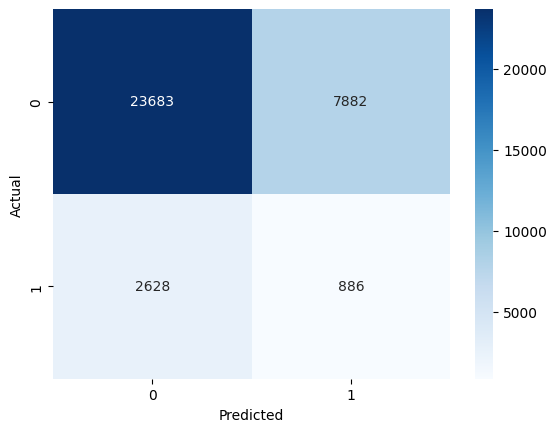

In [147]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

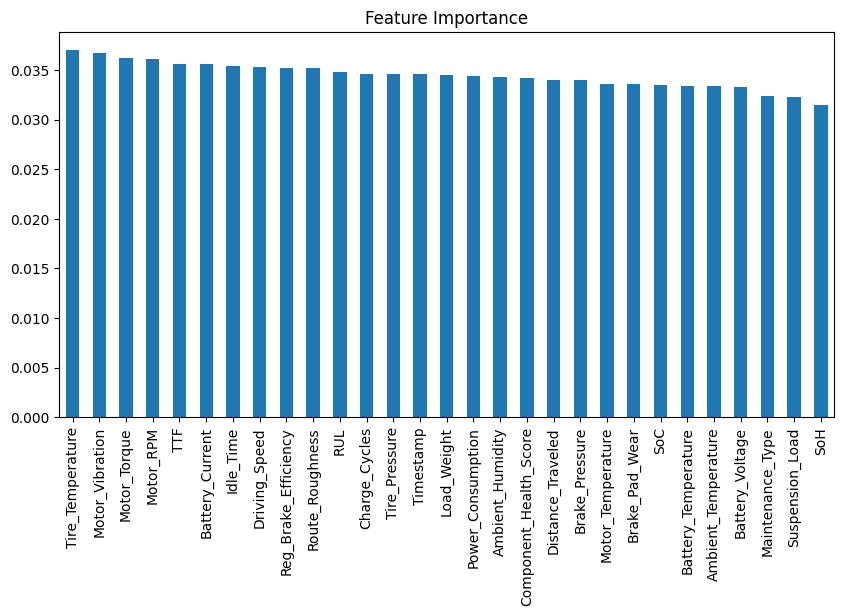

In [149]:
feat_imp = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Feature Importance')
plt.show()

In [150]:
from joblib import dump, load #dump is used to save the model and load is used to load the model
with open('xgboost.pkl', 'wb') as f:
    dump(xgb, f)  #dumping the model onto the file 
    print("Model saved successfully!")

Model saved successfully!


In [187]:
import numpy as np
import plotly.graph_objects as go

# ---------- Data Preparation ----------
cycles = np.arange(0, 200, 1)

# Simulated battery metrics
soc = 100 - cycles*0.5 + np.random.uniform(-3, 3, len(cycles))     # State of Charge %
soh = 100 - cycles*0.3 + np.random.uniform(-2, 2, len(cycles))     # State of Health %
voltage = 4.2 - cycles*0.01 + np.random.uniform(-0.05, 0.05, len(cycles))  # Voltage (V)
temp = 25 + np.sin(cycles/10)*5 + np.random.uniform(-2, 2, len(cycles))   # Temperature °C


In [152]:
fig_trend = go.Figure()

# --- Add Traces ---
fig_trend.add_trace(go.Scatter(x=cycles, y=soc, mode="lines", name="SoC (%)", line=dict(color="gold")))
fig_trend.add_trace(go.Scatter(x=cycles, y=soh, mode="lines", name="SoH (%)", line=dict(color="lightgreen")))
fig_trend.add_trace(go.Scatter(x=cycles, y=voltage, mode="lines", name="Voltage (V)", line=dict(color="red")))
fig_trend.add_trace(go.Scatter(x=cycles, y=temp, mode="lines", name="Temperature (°C)", line=dict(color="orange")))

# --- Layout & Annotations ---
fig_trend.update_layout(
    title="🔋 Battery Trends Over Cycles",
    template="plotly_dark",
    xaxis_title="Cycles",
    yaxis_title="Value",
    annotations=[
        dict(
            x=100, y=95,  # position of text
            xref="x", yref="y",
            text="⚡ SoC & SoH decrease slowly with cycles.<br>"
                "🔴 Voltage gradually drops.<br>"
                "🟠 Temperature shows fluctuations.<br>"
                "This graph helps track battery aging.",
            showarrow=False,
            font=dict(size=12, color="gold"),
            align="left",
            bordercolor="gold",
            borderwidth=1,
            bgcolor="black",
            opacity=0.8
        )
    ]
)

fig_trend.show()



In [154]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# 1. Create Time Index (100 records, every 15 minutes starting Jan 2020)
time_index = pd.date_range("2020-01-01", periods=100, freq="15min")

# 2. Create Sample Data (replace with your dataset columns)
torque = np.random.uniform(100, 200, size=100)      # Nm
rpm = np.random.uniform(1000, 4000, size=100)       # RPM
vibration = np.random.uniform(0.1, 1.0, size=100)   # g-force
power = np.random.uniform(50, 200, size=100)        # kW
motor_temp = np.random.uniform(40, 90, size=100)    # °C

# 3. Create One Graph with All Traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=time_index, y=torque, mode='lines', name="Torque (Nm)", line=dict(color="gold")))
fig.add_trace(go.Scatter(x=time_index, y=rpm, mode='lines', name="RPM", line=dict(color="cyan")))
fig.add_trace(go.Scatter(x=time_index, y=vibration, mode='lines', name="Vibration (g)", line=dict(color="red")))
fig.add_trace(go.Scatter(x=time_index, y=power, mode='lines', name="Power (kW)", line=dict(color="lightgreen")))
fig.add_trace(go.Scatter(x=time_index, y=motor_temp, mode='lines', name="Motor Temp (°C)", line=dict(color="orange")))

# 4. Layout Settings
fig.update_layout(
    title="⚙️ Motor & Drivetrain Monitoring (All in One Graph)",
    xaxis_title="Time (15-minute intervals)",
    yaxis_title="Sensor Values",
    template="plotly_dark",
    height=600,
    legend=dict(title="Parameters")
)

# 5. Show Graph
fig.show()


In [156]:
import plotly.graph_objects as go

# Example brake system values (replace with your actual data)
brake_pad_wear = 7.5          # Thickness of brake pads in millimeters (mm)
brake_pressure = 120          # Hydraulic brake pressure in pounds per square inch (psi)
regen_braking_efficiency = 85 # Regenerative braking efficiency in percentage (%)

# Create a bar chart with three bars representing the brake parameters
fig = go.Figure(
    data=[go.Bar(
        x=["Brake Pad Wear (mm)", "Brake Pressure (psi)", "Regen Braking Efficiency (%)"],  # Categories on x-axis
        y=[brake_pad_wear, brake_pressure, regen_braking_efficiency],                        # Corresponding values on y-axis
        marker_color=['firebrick', 'royalblue', 'green']                                    # Colors for each bar
    )],
    layout_title_text="Brake System Monitoring"
)

# Update layout to add axis titles and improve appearance
fig.update_layout(
    yaxis_title="Value",
    xaxis_title="Brake Parameters",
    template="plotly_white"  # Clean white background style
)

# Display the interactive bar chart
fig.show()

In [172]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Sample data
cycles = np.arange(1, 101)
tire_pressure = np.random.uniform(30, 35, 100)
tire_temperature = np.random.uniform(25, 45, 100)
suspension_load = np.random.uniform(200, 500, 100)

# Create subplots: 2 rows (graph + explanation)
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.7, 0.3],      # Graph 70%, explanation 30%
    vertical_spacing=0.15,       # Add more space between graph and table
    specs=[[{}], [{"type": "table"}]]
)

# Add graph traces
fig.add_trace(go.Scatter(x=cycles, y=tire_pressure, mode="lines", name="Tire Pressure (PSI)", line=dict(color="yellow")), row=1, col=1)
fig.add_trace(go.Scatter(x=cycles, y=tire_temperature, mode="lines", name="Tire Temperature (°C)", line=dict(color="blue")), row=1, col=1)
fig.add_trace(go.Scatter(x=cycles, y=suspension_load, mode="lines", name="Suspension Load", line=dict(color="lightgreen")), row=1, col=1)

# Add explanation table
fig.add_trace(go.Table(
    header=dict(values=["Explanation"], fill_color='black', font=dict(color='white', size=14)),
    cells=dict(values=[[ 
        "• Tire Pressure shows variations indicating normal inflations.<br>"
        "• Tire Temperature increases with driving intensity or friction.<br>"
        "• Suspension Load fluctuates depending on vehicle weight distribution and road conditions."
    ]],
    fill_color='black', font=dict(color='white', size=12), align='left')
), row=2, col=1)

# Update layout
fig.update_layout(
    title="Tire & Suspension Monitoring Over Cycles",
    template="plotly_dark",
    xaxis_title="Braking / Driving Cycles",
    yaxis_title="Metric Values",
    width=900,
    height=600,
    legend_title="Metrics"
)

fig.show()


In [173]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Sample data
cycles = np.arange(1, 101)
ambient_temp = np.random.uniform(15, 35, 100)     # °C
ambient_humidity = np.random.uniform(30, 80, 100) # %
load_weight = np.random.uniform(0, 500, 100)      # kg
driving_speed = np.random.uniform(0, 120, 100)    # km/h

# Create subplots: 2 rows (graph + explanation)
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.7, 0.3],
    vertical_spacing=0.15,
    specs=[[{}], [{"type": "table"}]]
)

# Add line traces
fig.add_trace(go.Scatter(x=cycles, y=ambient_temp, mode="lines", name="Ambient Temp (°C)", line=dict(color="orange")), row=1, col=1)
fig.add_trace(go.Scatter(x=cycles, y=ambient_humidity, mode="lines", name="Ambient Humidity (%)", line=dict(color="lightblue")), row=1, col=1)
fig.add_trace(go.Scatter(x=cycles, y=load_weight, mode="lines", name="Load Weight (kg)", line=dict(color="lightgreen")), row=1, col=1)
fig.add_trace(go.Scatter(x=cycles, y=driving_speed, mode="lines", name="Driving Speed (km/h)", line=dict(color="gold")), row=1, col=1)

# Add explanation table
fig.add_trace(go.Table(
    header=dict(values=["Explanation"], fill_color='black', font=dict(color='white', size=14)),
    cells=dict(values=[[ 
        "• Ambient Temperature shows external conditions affecting battery & motor performance.<br>"
        "• Ambient Humidity affects traction and system cooling.<br>"
        "• Load Weight impacts energy consumption and suspension stress.<br>"
        "• Driving Speed influences battery drain and braking requirements."
    ]],
    fill_color='black', font=dict(color='white', size=12), align='left')
), row=2, col=1)

# Update layout
fig.update_layout(
    title="Environmental & Usage Monitoring Over Cycles",
    template="plotly_dark",
    xaxis_title="Driving / Operation Cycles",
    yaxis_title="Metric Values",
    width=900,
    height=600,
    legend_title="Metrics"
)

fig.show()


In [175]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Sample data
cycles = np.arange(1, 101)
distance_traveled = np.cumsum(np.random.uniform(0.5, 2.5, 100))  # km, cumulative
idle_time = np.random.uniform(0, 30, 100)                        # minutes
route_roughness = np.random.uniform(0, 10, 100)                  # arbitrary units

# Create subplots: 3 rows, 1 column
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    vertical_spacing=0.08,
                    subplot_titles=("Distance Traveled (km)", 
                                    "Idle Time (minutes)",
                                    "Route Roughness"))

# Add traces
fig.add_trace(go.Scatter(x=cycles, y=distance_traveled, mode="lines", name="Distance Traveled", line=dict(color="gold")), row=1, col=1)
fig.add_trace(go.Scatter(x=cycles, y=idle_time, mode="lines", name="Idle Time", line=dict(color="orange")), row=2, col=1)
fig.add_trace(go.Scatter(x=cycles, y=route_roughness, mode="lines", name="Route Roughness", line=dict(color="lightgreen")), row=3, col=1)

# Layout settings
fig.update_layout(
    template="plotly_dark",
    height=700,
    width=900,
    title_text="Telematics and Fleet Data Over Driving Cycles",
    showlegend=False
)

# Add explanation block on top
fig.add_annotation(
    x=0, y=1.15, xref='paper', yref='paper',
    text=(
        "<b>Explanation:</b><br>"
        "• Distance Traveled shows cumulative distance over cycles.<br>"
        "• Idle Time indicates duration the vehicle is stationary.<br>"
        "• Route Roughness reflects road conditions affecting vehicle wear."
    ),
    showarrow=False,
    font=dict(size=12, color="white"),
    align="left",
    bordercolor="white",
    borderwidth=1,
    bgcolor="black",
    opacity=0.9
)

fig.update_xaxes(title_text="Driving / Braking Cycles", row=3, col=1)
fig.show()


In [177]:
import plotly.graph_objects as go
import numpy as np

# Sample data
cycles = np.arange(1, 101)
distance_traveled = np.cumsum(np.random.uniform(0.5, 2.5, 100))  # km, cumulative
idle_time = np.random.uniform(0, 30, 100)                        # minutes
route_roughness = np.random.uniform(0, 10, 100)                  # arbitrary units

# Create figure
fig = go.Figure()

# Add traces for all metrics in the same graph
fig.add_trace(go.Scatter(x=cycles, y=distance_traveled, mode="lines", name="Distance Traveled (km)", line=dict(color="gold", width=2)))
fig.add_trace(go.Scatter(x=cycles, y=idle_time, mode="lines", name="Idle Time (minutes)", line=dict(color="orange", width=2, dash="dash")))
fig.add_trace(go.Scatter(x=cycles, y=route_roughness, mode="lines", name="Route Roughness", line=dict(color="lightgreen", width=2, dash="dot")))

# Layout
fig.update_layout(
    title="Telematics and Fleet Data Over Driving Cycles",
    template="plotly_dark",
    xaxis_title="Driving / Braking Cycles",
    yaxis_title="Metric Values",
    width=900,
    height=500,
    legend_title="Metrics",
    annotations=[dict(
        x=0, y=1.15, xref="paper", yref="paper",
        text=(
            "<b>Explanation:</b><br>"
            "• Distance Traveled shows cumulative distance covered.<br>"
            "• Idle Time indicates duration the vehicle is stationary.<br>"
            "• Route Roughness reflects road surface conditions affecting wear."
        ),
        showarrow=False,
        font=dict(size=12, color="white"),
        align="left",
        bordercolor="white",
        borderwidth=1,
        bgcolor="black",
        opacity=0.9
    )]
)

fig.show()



In [184]:
import plotly.graph_objects as go
import numpy as np

# Sample data
cycles = np.arange(1, 101)
rul = np.random.uniform(50, 100, 100)          # Remaining Useful Life %
ttf = np.random.uniform(30, 90, 100)           # Time to Failure %
health_score = np.random.uniform(60, 100, 100) # Health Score %

# Create figure
fig_forecast = go.Figure()

# Add traces
fig_forecast.add_trace(go.Scatter(x=cycles, y=rul, mode="lines", name="RUL (%)", line=dict(color="gold", width=2)))
fig_forecast.add_trace(go.Scatter(x=cycles, y=ttf, mode="lines", name="TTF (%)", line=dict(color="orange", width=2, dash="dash")))
fig_forecast.add_trace(go.Scatter(x=cycles, y=health_score, mode="lines", name="Health Score (%)", line=dict(color="lightgreen", width=2)))

# Layout with explanation
fig_forecast.update_layout(
    title="Multi-Horizon Forecasts Over Cycles",
    template="plotly_dark",
    xaxis_title="Cycles",
    yaxis_title="Percentage / Score",
    width=900,
    height=500,
    legend_title="Metrics",
    annotations=[dict(
        x=0, y=1.15, xref="paper", yref="paper",
        text=(
            "<b>Explanation:</b><br>"
            "• RUL shows the predicted Remaining Useful Life of components.<br>"
            "• TTF estimates time until failure.<br>"
            "• Health Score combines metrics to assess overall component condition."
        ),
        showarrow=False,
        font=dict(size=12, color="white"),
        align="left",
        bordercolor="white",
        borderwidth=1,
        bgcolor="black",
        opacity=0.9
    )]
)

fig_forecast.show()


In [186]:
import plotly.graph_objects as go
import numpy as np

# Sample data
cycles = np.arange(1, 101)
fleet1_accuracy = np.random.uniform(70, 95, 100)
fleet2_accuracy = np.random.uniform(65, 92, 100)
fleet3_accuracy = np.random.uniform(68, 94, 100)

# Create figure
fig_federated = go.Figure()

# Add traces
fig_federated.add_trace(go.Scatter(x=cycles, y=fleet1_accuracy, mode="lines", name="Fleet 1 Accuracy (%)", line=dict(color="blue", width=2)))
fig_federated.add_trace(go.Scatter(x=cycles, y=fleet2_accuracy, mode="lines", name="Fleet 2 Accuracy (%)", line=dict(color="orange", width=2, dash="dash")))
fig_federated.add_trace(go.Scatter(x=cycles, y=fleet3_accuracy, mode="lines", name="Fleet 3 Accuracy (%)", line=dict(color="lightgreen", width=2, )))

# Layout with explanation
fig_federated.update_layout(
    title="Federated Learning: Model Accuracy Across Fleets",
    template="plotly_dark",
    xaxis_title="Training Rounds / Cycles",
    yaxis_title="Accuracy (%)",
    width=900,
    height=500,
    legend_title="Fleets",
    annotations=[dict(
        x=0, y=1.15, xref="paper", yref="paper",
        text=(
            "<b>Explanation:</b><br>"
            "• Each line represents a fleet's local model accuracy during federated training.<br>"
            "• Federated Learning allows collaborative improvements without sharing raw data.<br>"
            "• Observe convergence of models and how collaboration boosts overall accuracy."
        ),
        showarrow=False,
        font=dict(size=12, color="white"),
        align="left",
        bordercolor="white",
        borderwidth=1,
        bgcolor="black",
        opacity=0.9
    )]
)

fig_federated.show()
